### **Step 1: Importing Libraries**



In [2]:
import missingno as msno
import pandas as pd
import numpy as np

### **Step 2: Loading the Dataset**

In [3]:
df=pd.read_csv("/content/credit_train.csv")

### **Step 3: Exploring the Dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [5]:
df.isnull().sum()

,0
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


**calculating the percentage of null values:**

In [8]:
round((df.isnull().sum()/len(df))*100)

,0
Loan ID,1.0
Customer ID,1.0
Loan Status,1.0
Current Loan Amount,1.0
Term,1.0
Credit Score,20.0
Annual Income,20.0
Years in current job,5.0
Home Ownership,1.0
Purpose,1.0


### **Step 4: Visualizations in missingno**





**4.1 Bar Plot:A bar plot shows how much data is present (or missing) in each column.**

<Axes: >

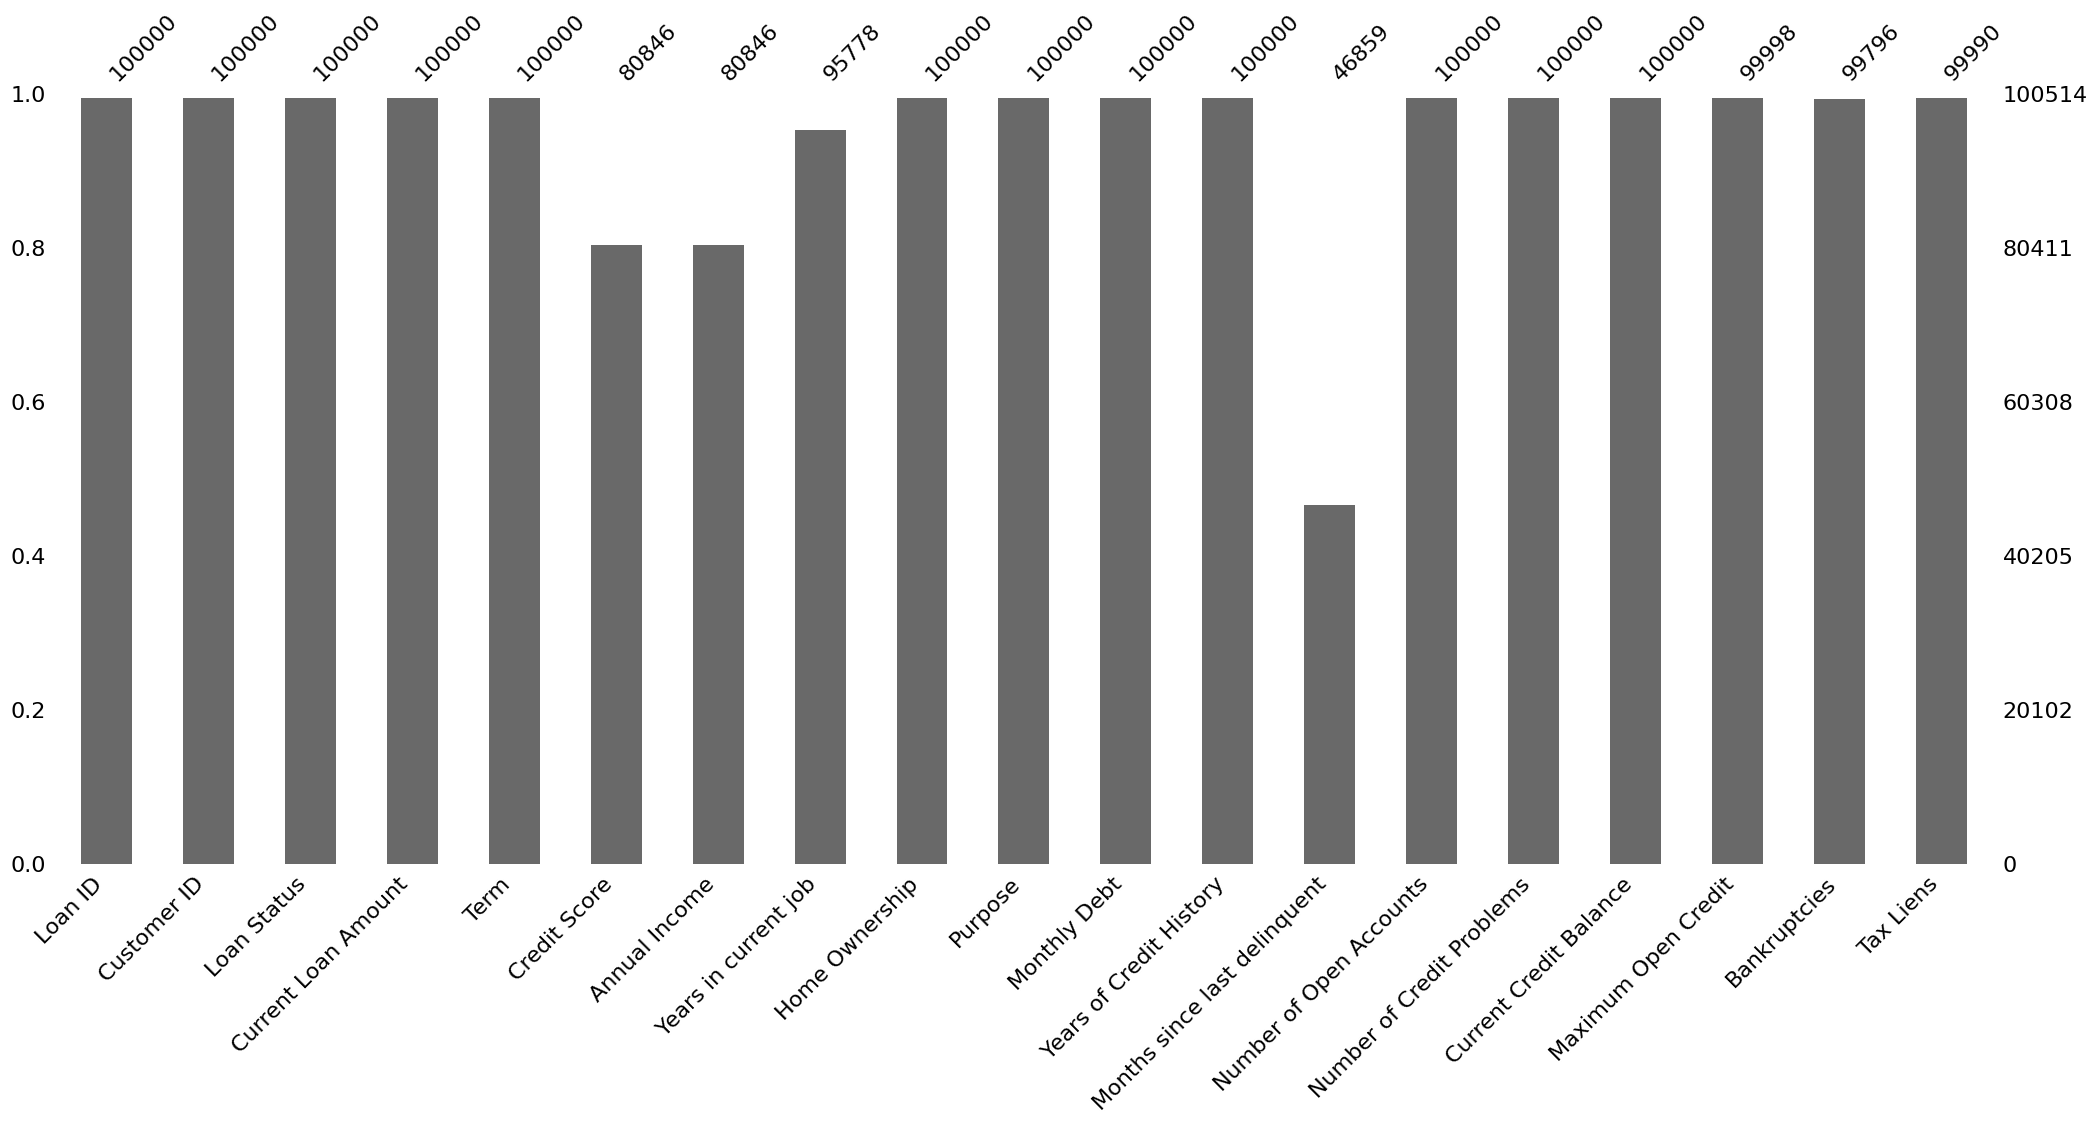

In [9]:
msno.bar(df)

**4.2 Dendrogram:The dendrogram clusters variables based on the similarity of their missing data patterns. This helps you see which columns share similar missingness behavior. **



<Axes: >

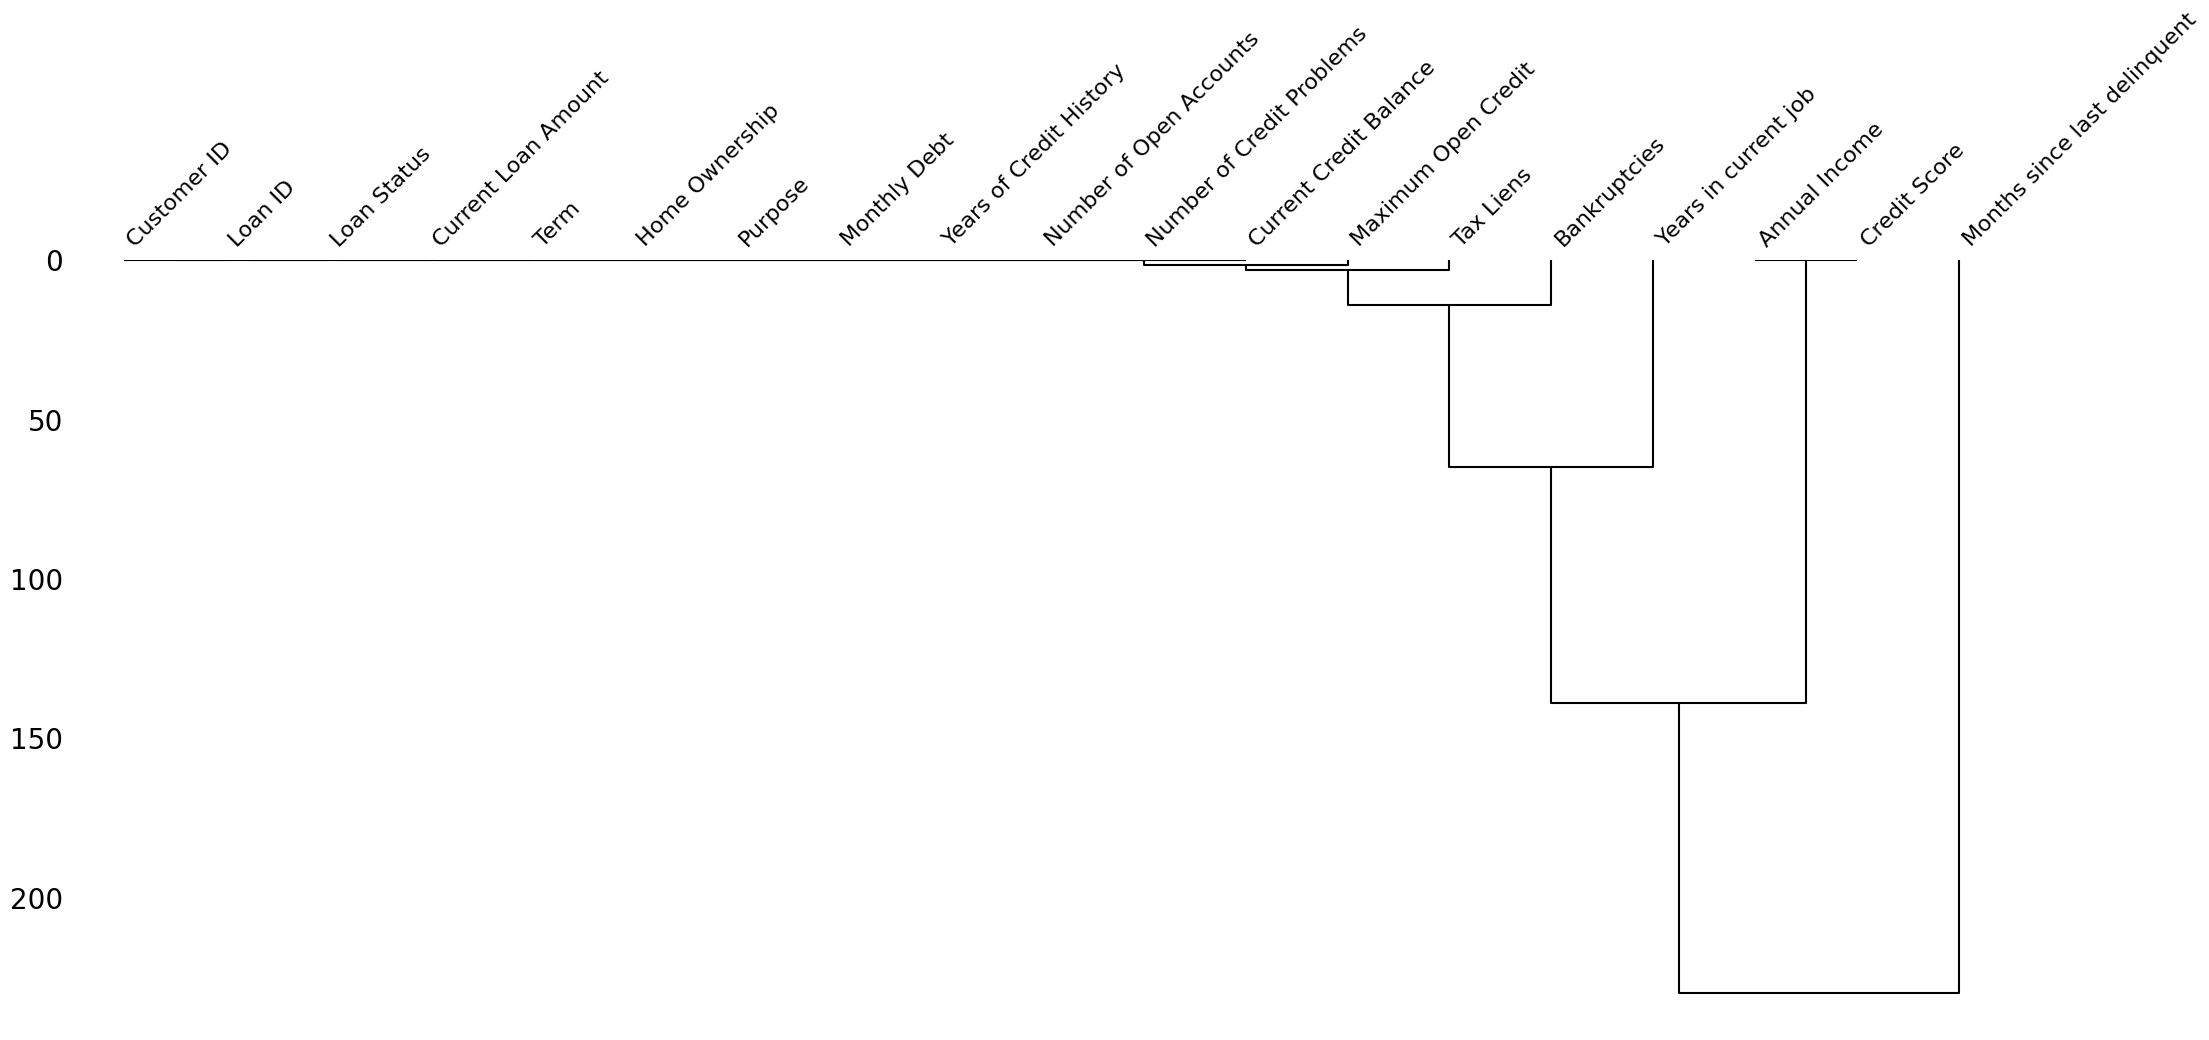

In [10]:
msno.dendrogram(df)

**4.3 Heatmap :The heatmap displays the correlations between missing data across variables. It helps identify relationships between missingness in different columns, which can give you clues about whether the data is MCAR, MAR, or MNAR.**

<Axes: >

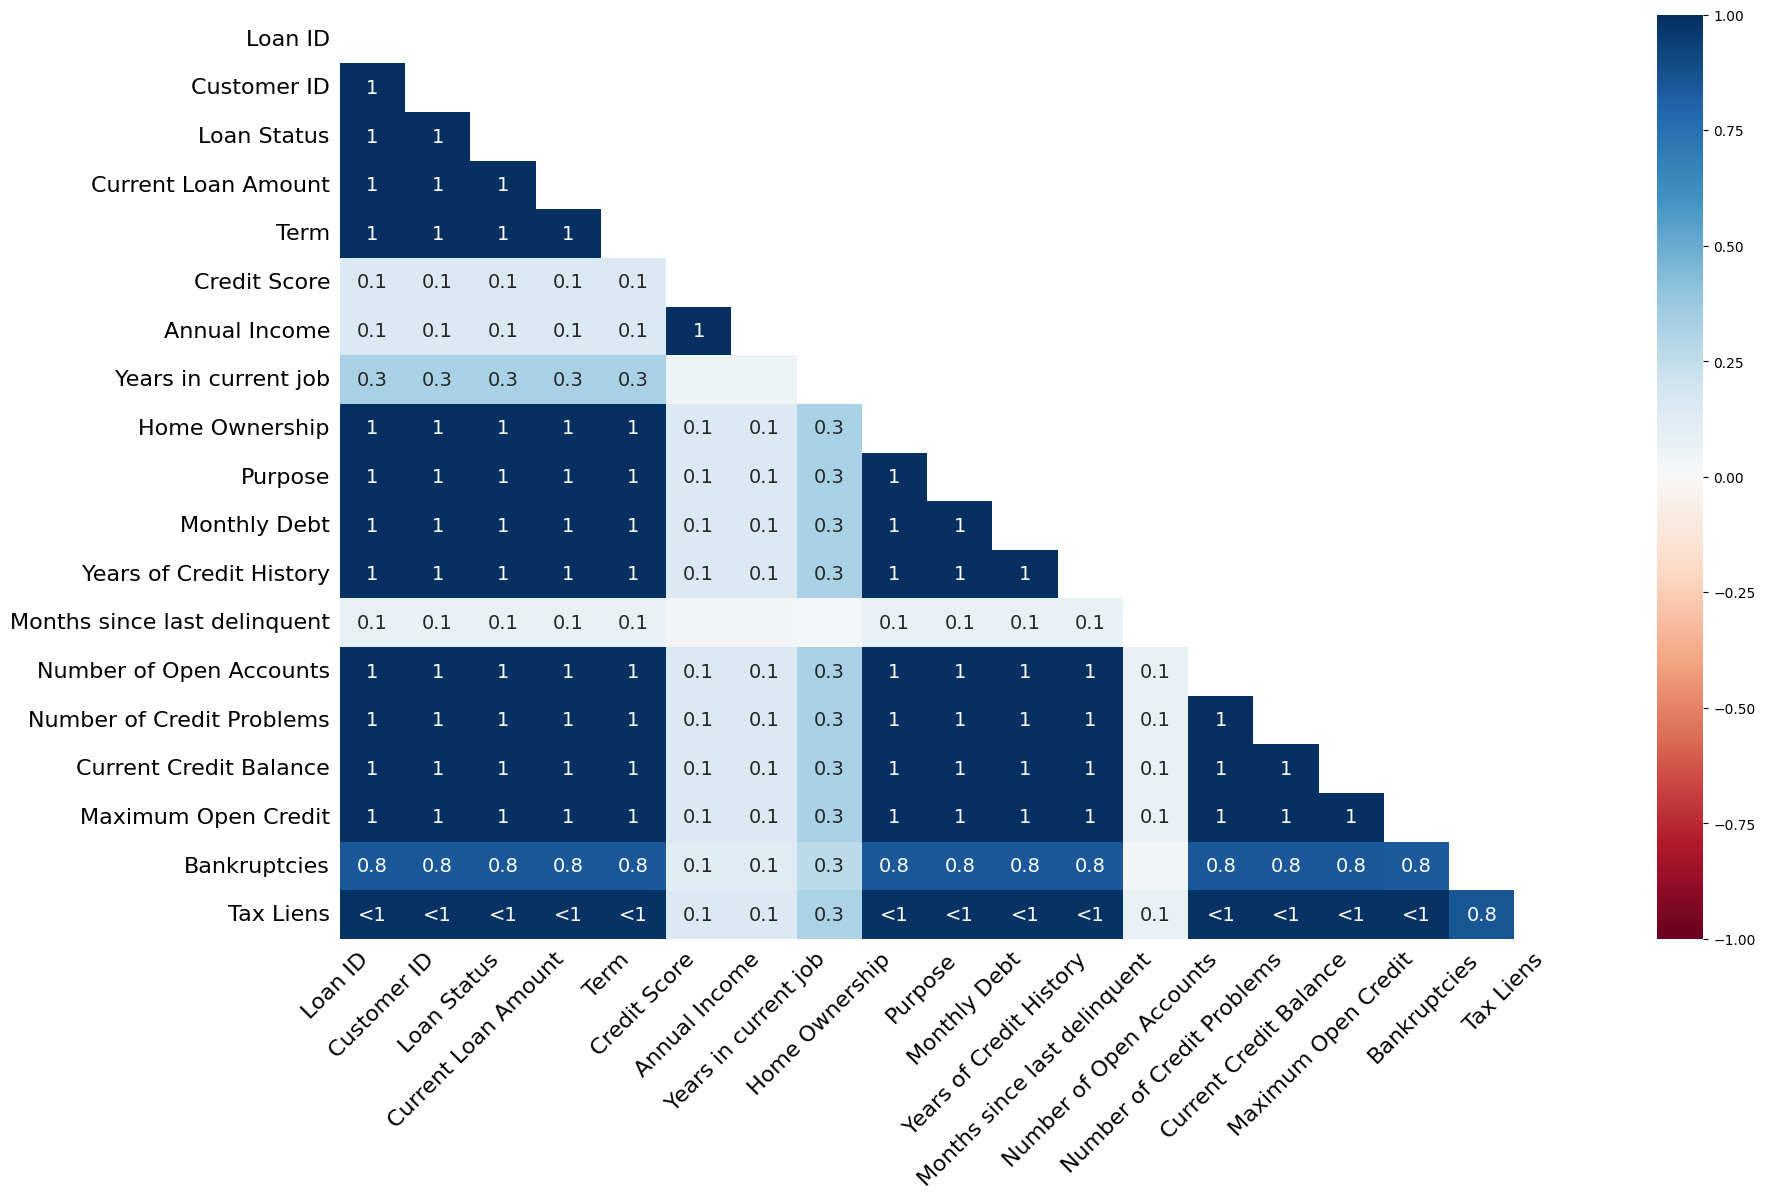

In [11]:
msno.heatmap(df)

**4.4 Matrix Plot:The matrix plot provides an overview of where the missing values are located.**

<Axes: >

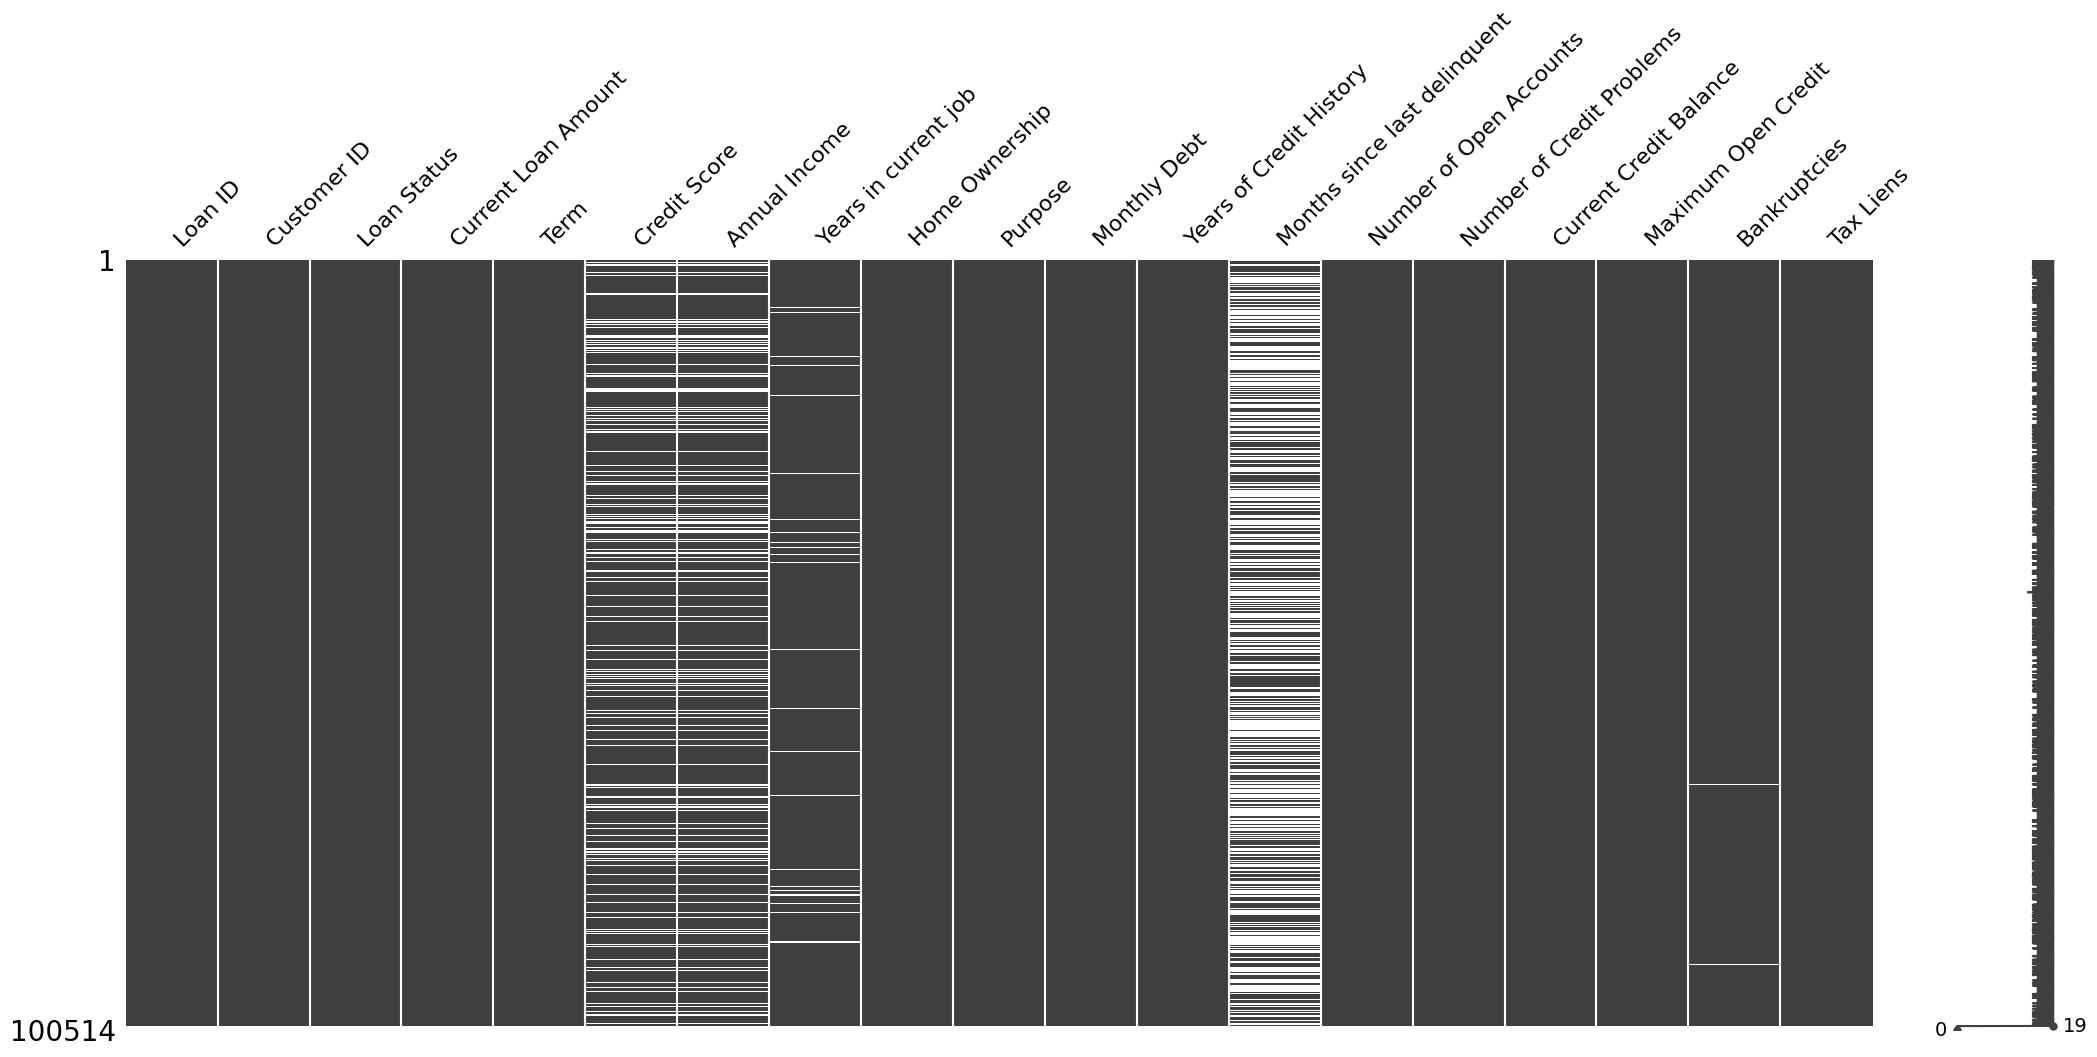

In [12]:
msno.matrix(df)

**4.5 User Defined funciton for Finding the columns which exceeds the threshold using missingno:**

---



Columns with more than 40.0% missing values: ['Months since last delinquent']


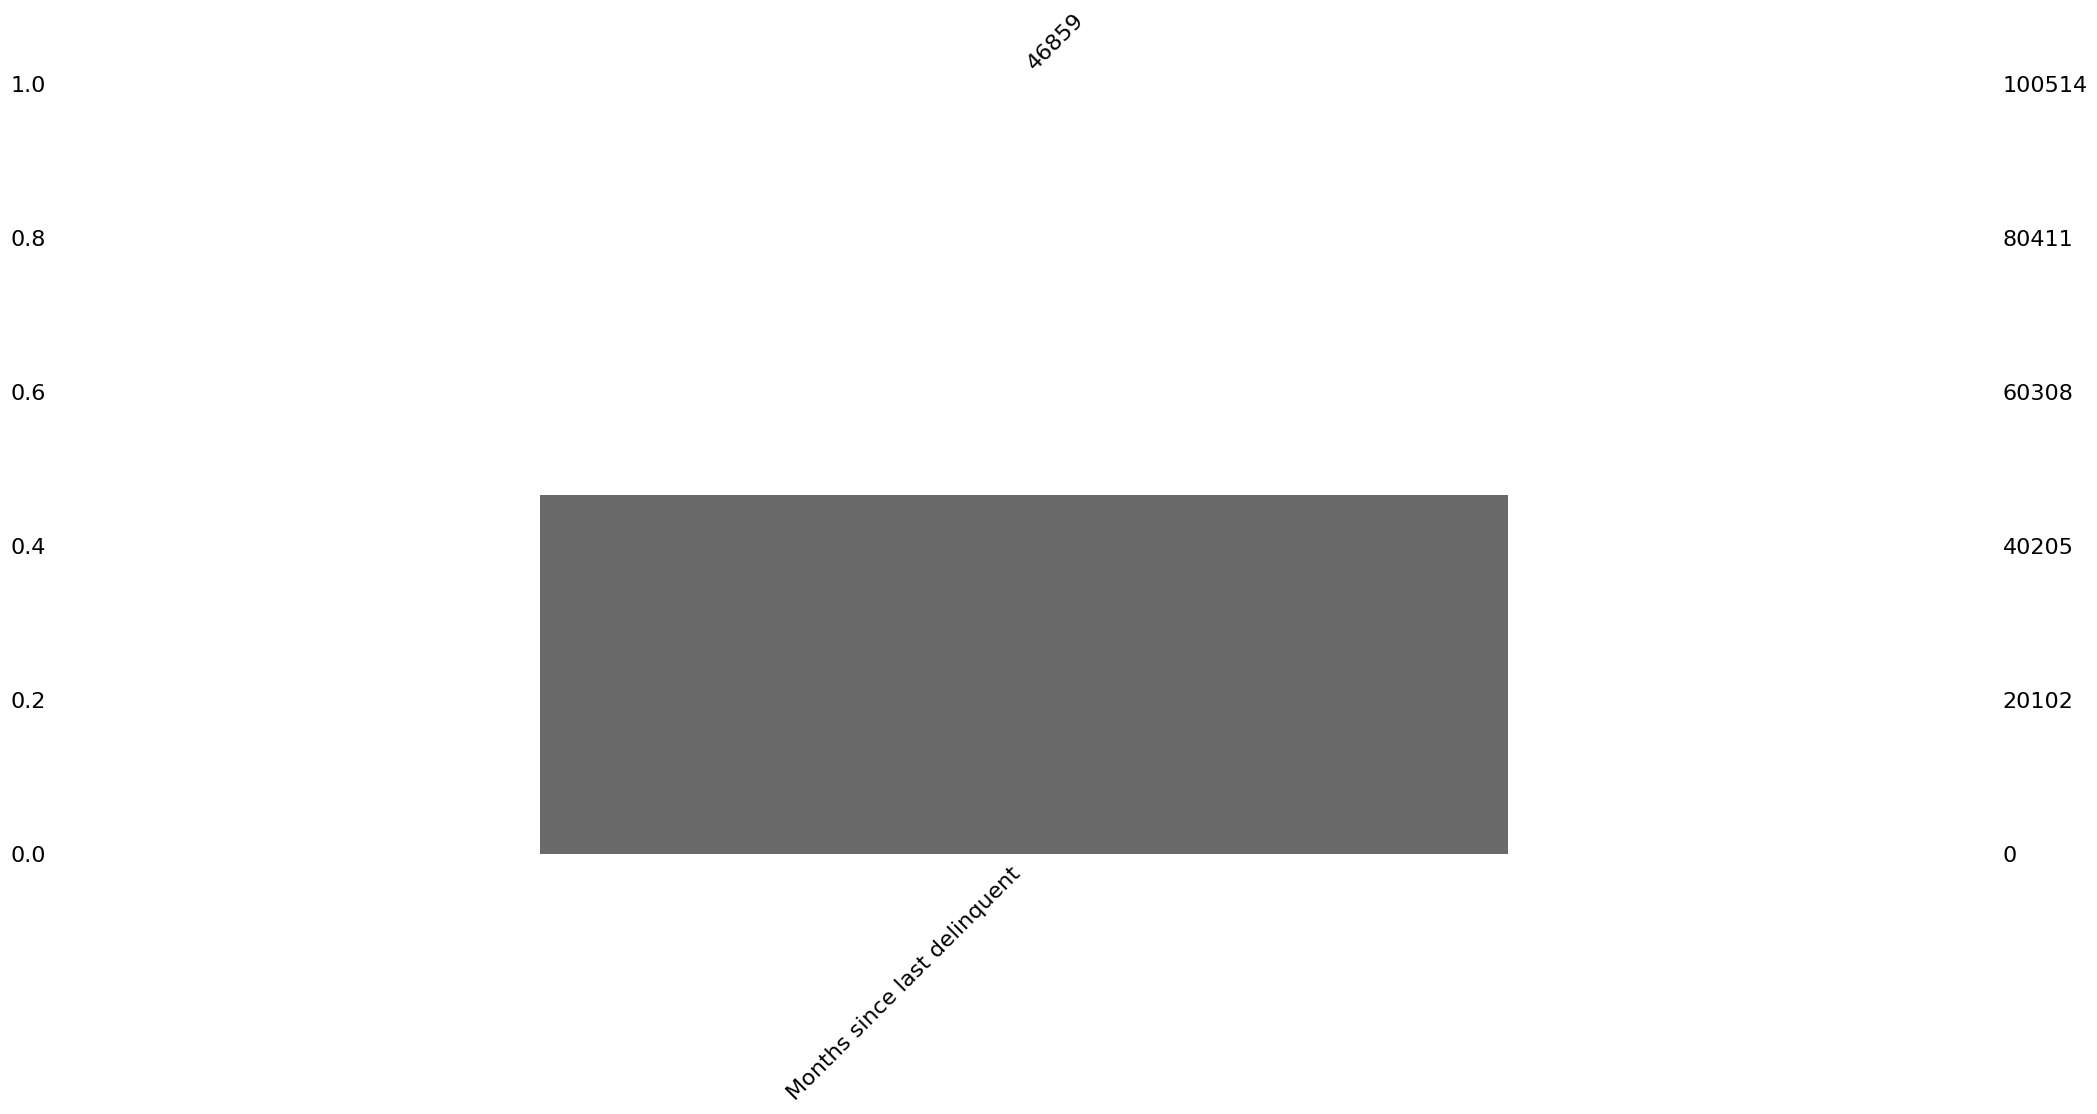

In [18]:

def visualize_incomplete_columns(df, threshold=0.5):
    """
    This function computes the percentage of missing values for each column in the DataFrame,
    finds columns with missing values greater than the specified threshold, and visualizes them
    using missingno's bar plot if such columns exist.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - threshold (float): The percentage (in decimal) of missing values above which columns are considered incomplete.

    Returns:
    - None
    """
    # Step 1: Compute the percentage of missing values for each column
    missing_percentages = df.isnull().mean()

    # Step 2: Find columns where the missing percentage is greater than the threshold
    incomplete_columns = missing_percentages[missing_percentages > threshold].index.tolist()

    # Step 3: Check if there are any incomplete columns
    if incomplete_columns:
        print(f"Columns with more than {threshold * 100}% missing values: {incomplete_columns}")

        # Step 4: Visualize the missing data in these columns using msno.bar
        msno.bar(df[incomplete_columns])
    else:
        print(f"No columns have more than {threshold * 100}% missing values.")


# Call the function with the dataset and a threshold of 0.4
visualize_incomplete_columns(df, threshold=0.4)


**4.5 User Defined funciton for Finding the Rows which exceeds the threshold using missingno:**

---



Rows with more than 40.0% missing values: [100000, 100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010, 100011, 100012, 100013, 100014, 100015, 100016, 100017, 100018, 100019, 100020, 100021, 100022, 100023, 100024, 100025, 100026, 100027, 100028, 100029, 100030, 100031, 100032, 100033, 100034, 100035, 100036, 100037, 100038, 100039, 100040, 100041, 100042, 100043, 100044, 100045, 100046, 100047, 100048, 100049, 100050, 100051, 100052, 100053, 100054, 100055, 100056, 100057, 100058, 100059, 100060, 100061, 100062, 100063, 100064, 100065, 100066, 100067, 100068, 100069, 100070, 100071, 100072, 100073, 100074, 100075, 100076, 100077, 100078, 100079, 100080, 100081, 100082, 100083, 100084, 100085, 100086, 100087, 100088, 100089, 100090, 100091, 100092, 100093, 100094, 100095, 100096, 100097, 100098, 100099, 100100, 100101, 100102, 100103, 100104, 100105, 100106, 100107, 100108, 100109, 100110, 100111, 100112, 100113, 100114, 100115, 100116, 100117, 100118, 10011

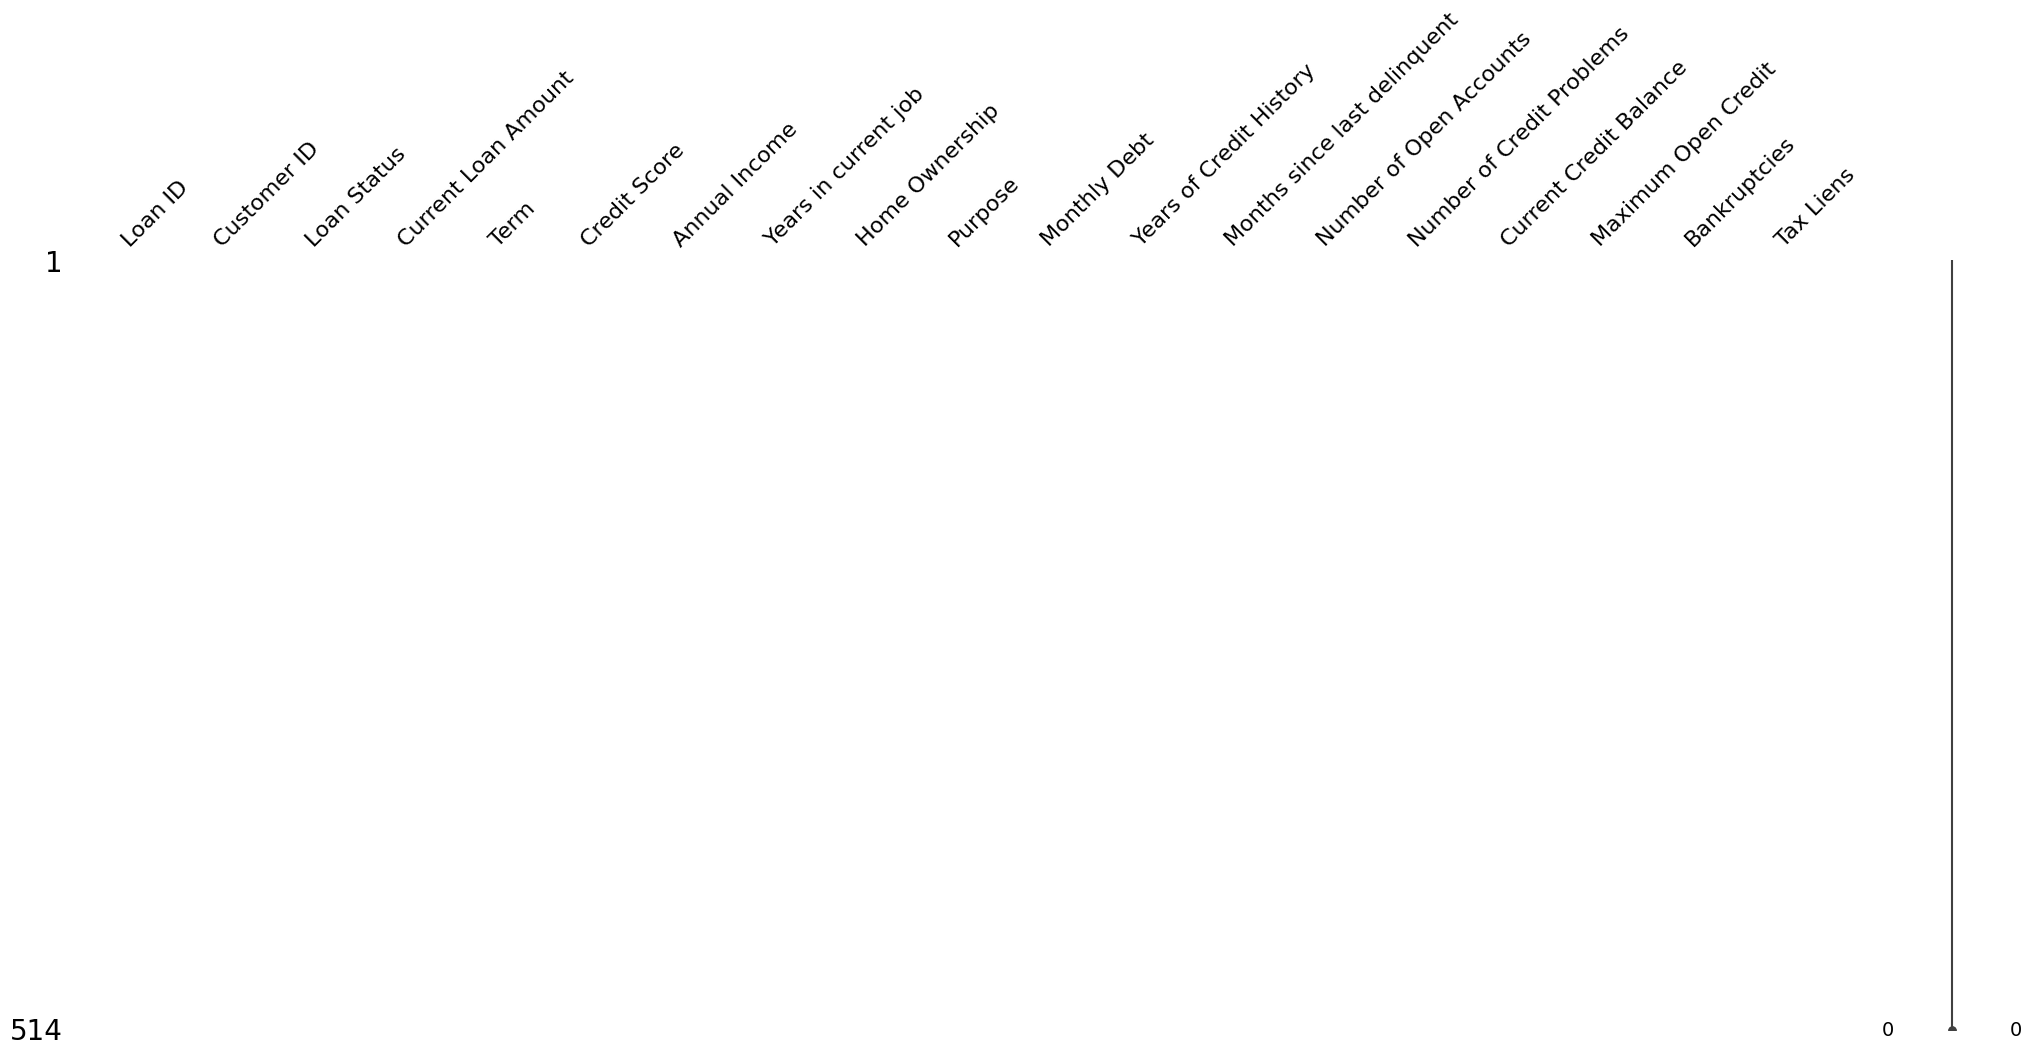

In [26]:
import pandas as pd
import missingno as msno

def visualize_incomplete_rows(df, threshold=0.5):
    """
    This function computes the percentage of missing values for each row in the DataFrame,
    finds rows with missing values greater than the specified threshold, and visualizes them
    using missingno's matrix plot if such rows exist.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - threshold (float): The percentage (in decimal) of missing values above which rows are considered incomplete.

    Returns:
    - None
    """
    # Step 1: Compute the percentage of missing values for each row
    row_nullity = df.isnull().mean(axis=1)

    # Step 2: Find rows where the missing percentage is greater than the threshold
    incomplete_rows = df.loc[row_nullity > threshold]

    # Step 3: Check if there are any incomplete rows
    if not incomplete_rows.empty:
        print(f"Rows with more than {threshold * 100}% missing values: {incomplete_rows.index.tolist()}")

        # Step 4: Visualize the missing data in these rows using msno.matrix
        msno.matrix(incomplete_rows)
    else:
        print(f"No rows have more than {threshold * 100}% missing values.")



# Call the function with the dataset and a threshold of 0.4
visualize_incomplete_rows(df, threshold=0.4)
